# Holiday Analysis

Take special note of the `transferred` column. A holiday officially falls on the designated calendar day but may be moved to another date by the government. A transferred day resembles a regular day more than a holiday. To determine the actual celebration date, refer to the corresponding row where the type is marked as `Transfer`. <br>

For instance, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, indicating that it was celebrated on 2012-10-12. Days labeled as `Bridge` are additional days added to a holiday to extend the break over a long weekend. These are often compensated by `Work Day`, a day not typically scheduled for work (e.g., Saturday) meant to make up for the Bridge.<br>

Additional holidays are days added to regular calendar holidays, commonly observed around Christmas (such as making Christmas Eve a holiday).

#### To Do:
- Check the relationship with holidays and sales
- Check the relationships with holidays and promotions
- Check the nan holidays

In [297]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)}) 

In [298]:
holiday_df = pd.read_csv("./data/raw/holidays_events.csv")
holiday_df.rename(columns={"type": "event"}, inplace=True)
holiday_df.head(20)

,date,event,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [299]:
holiday_df[holiday_df["transferred"] == True]

,date,event,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


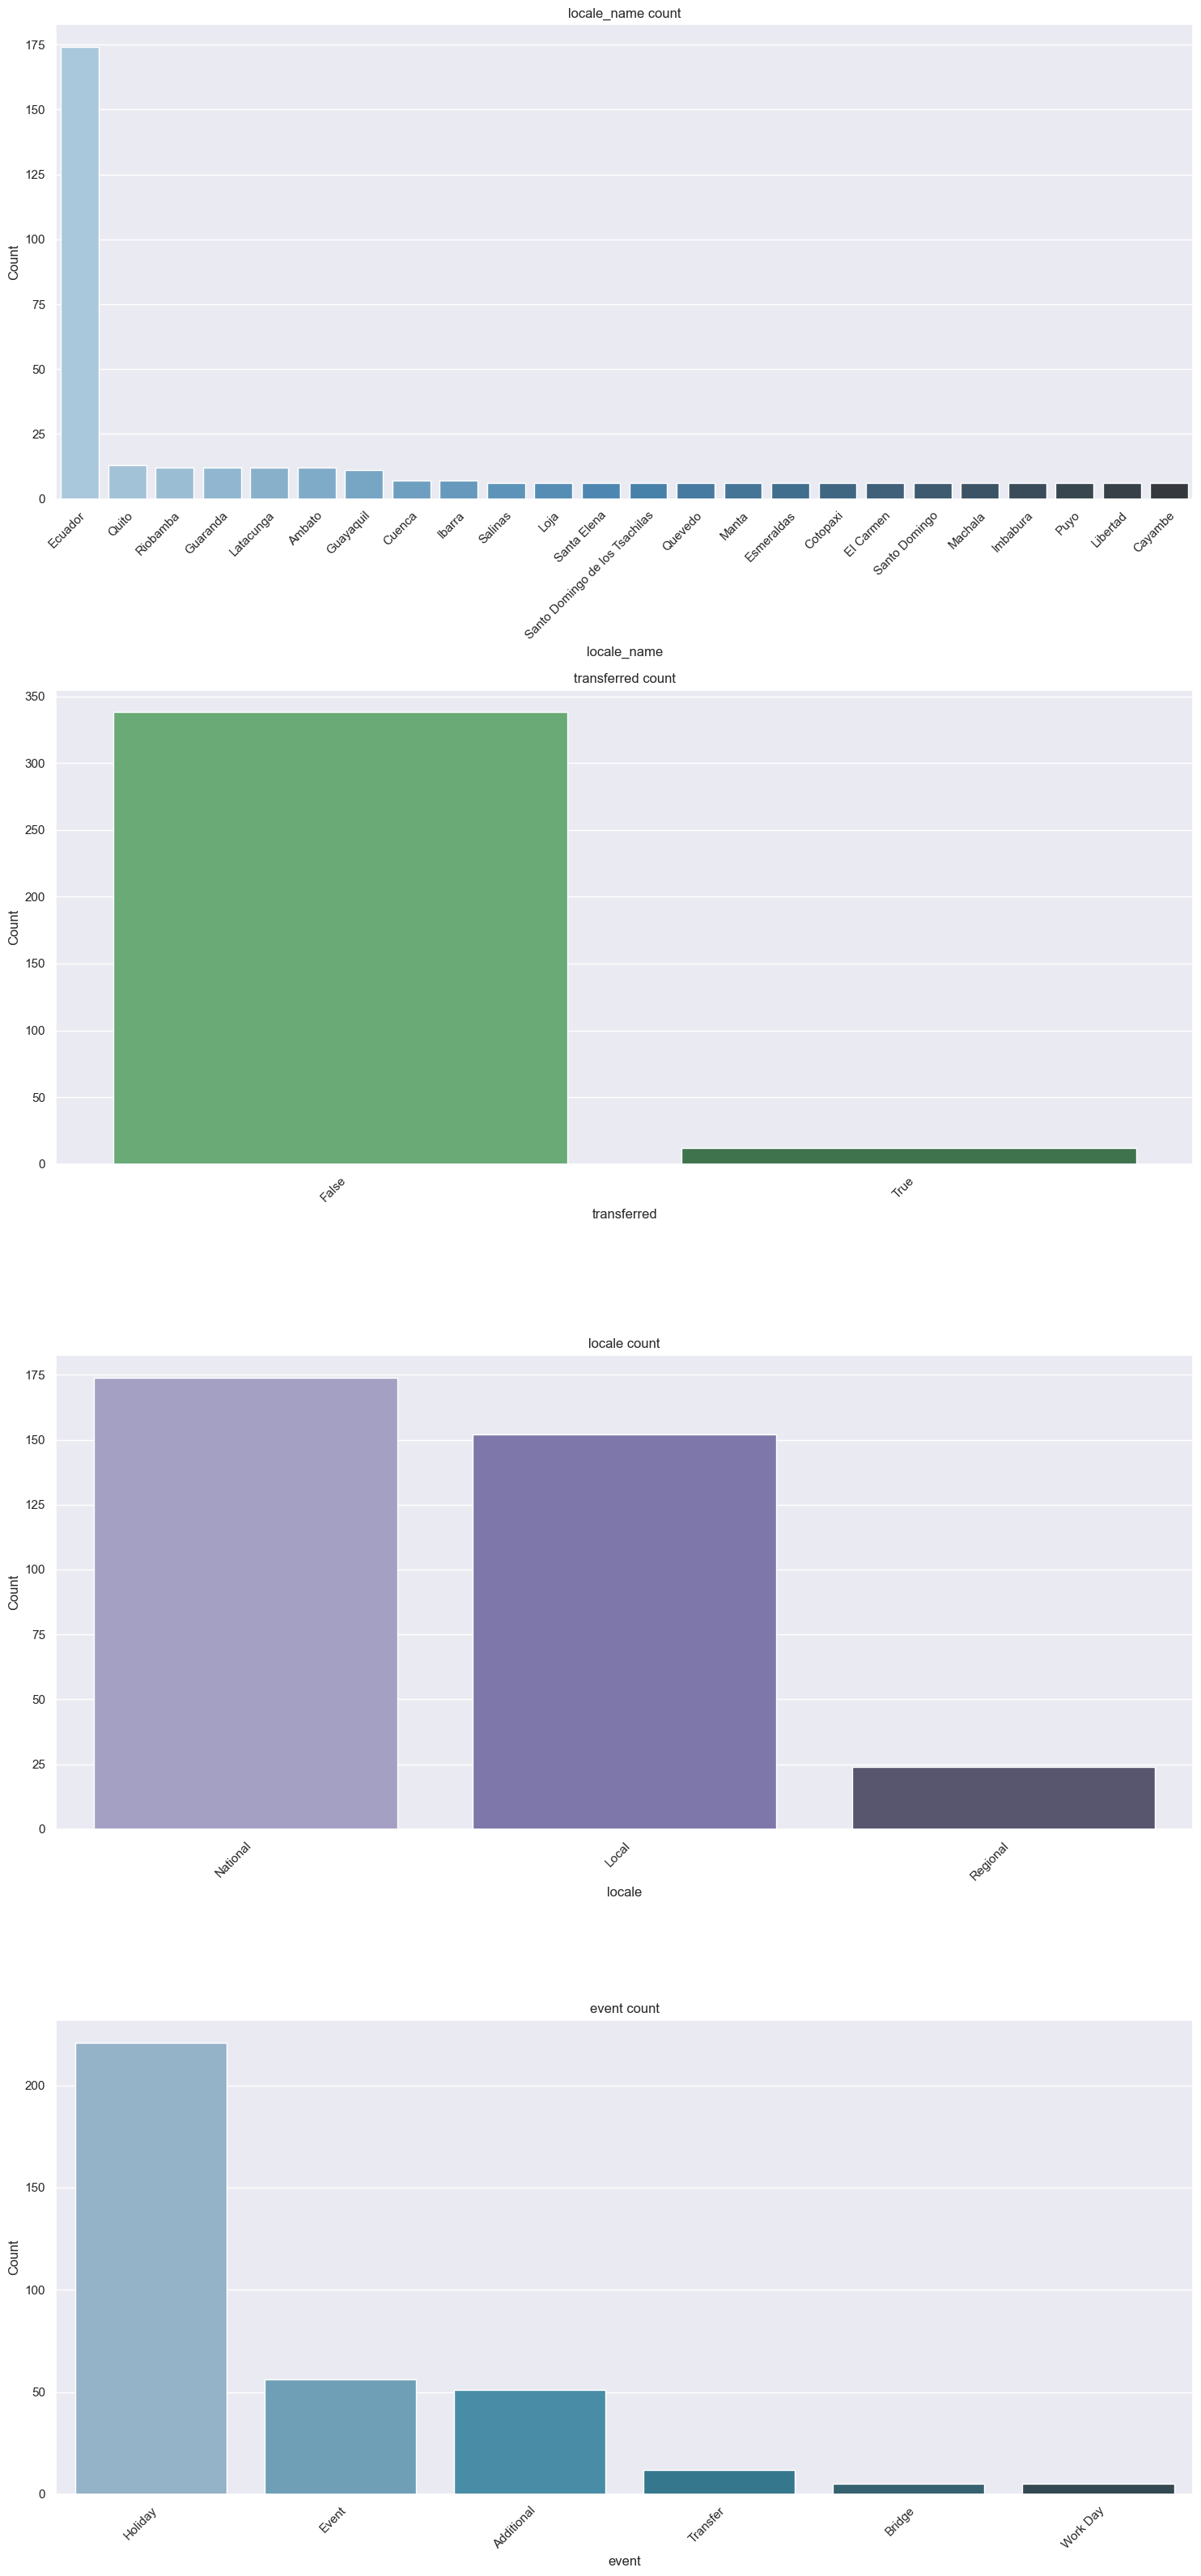

In [300]:
columns = ["locale_name", "transferred", "locale", "event"]
fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (15,4*8))
sets = ["Blues_d","Greens_d", "Purples_d","PuBuGn_d"]

for i, col in enumerate(columns):
    sns.countplot(holiday_df[col], order=holiday_df[col].value_counts(ascending=False).index, palette = sets[i], ax=axes[i])
    axes[i].set_title(f'{col} count')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    # axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

In [301]:
# contrast the sales performance of the store on a typical working day with its sales on national holidays

unique_holidays = holiday_df["date"].unique()
train_df = pd.read_csv("./data/raw/train.csv")
train_dates = train_df["date"].unique()

remaining_dates = [date for date in train_dates if date not in unique_holidays]
random_dates = np.random.choice(remaining_dates, 312, replace=False)

# filter train_df
selected_dates = train_df[train_df["date"].isin(random_dates)]

selected_dates = selected_dates.groupby("date")["sales"].sum()
total_selected_sum = selected_dates.sum()

print("Total Sales on Work Days :", total_selected_sum)


national_holidays = holiday_df[holiday_df["locale"] == "National"]
national_holiday_dates = national_holidays["date"].tolist()

train_dates_holidays = train_df[train_df["date"].isin(national_holiday_dates)]
total_national_holiday_sales = train_dates_holidays["sales"].sum()

print("Total Sales on National Holidays :", total_national_holiday_sales)

national_local_holidays = holiday_df[holiday_df["locale"] == "Local"]
national_local_holiday_dates = national_local_holidays["date"].tolist()

train_dates_local_holidays = train_df[train_df["date"].isin(national_local_holiday_dates)]
total_local_holiday_sales = train_dates_local_holidays["sales"].sum()
print("Total Sales on Local Holidays :", total_local_holiday_sales)

Total Sales on Work Days : 191861124.4588095
Total Sales on National Holidays : 105135372.47643279
Total Sales on Local Holidays : 68580322.87333609


The data illustrates a predominant trend of higher sales on Working Days in comparison to National Holidays. Although National Holidays yield significant revenue, it is crucial to analyze the individual holidays that exert the most influence on sales. Pinpointing the specific public holidays with the highest impact is essential for strategic evaluation.<br>

Furthermore, it is crucial to evaluate the efficacy of promotions and marketing campaigns during Public Holidays. Assessing whether these initiatives are achieving the anticipated increase in sales and determining if adjustments are necessary to amplify their impact is essential.

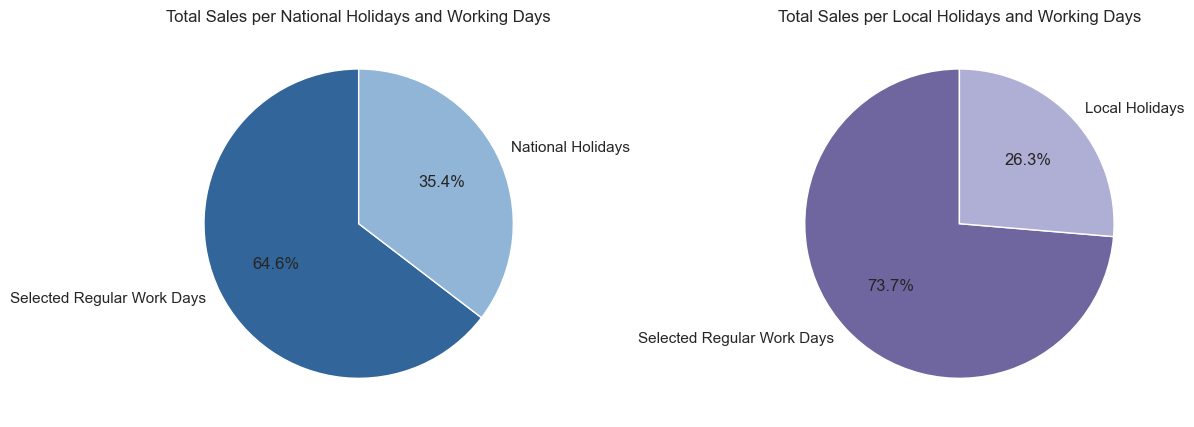

In [302]:
holiday_values = [total_national_holiday_sales,total_local_holiday_sales]
colors = ["#326599", "#91b5d6","#6f66a0", "#afaed4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()


for i, values in enumerate(holiday_values):
    if i == 0:
        labels = ['Selected Regular Work Days', 'National Holidays']
    else:
        labels= ['Selected Regular Work Days', 'Local Holidays']
    
    sale_values = [total_selected_sum, values]

    current_colors = colors[i*2:i*2 + 2]

    axes[i].pie(sale_values, labels=labels, autopct="%1.1f%%", colors=current_colors, startangle=90)
    axes[i].set_title(f"Total Sales per {labels[1]} and Working Days")

plt.tight_layout()
plt.show()
    

Examining the pie charts, it is evident that holidays do not exert a significant impact on total sales compared to regular working days. However, a comparison between National Holidays and Local Holidays reveals higher sales on National Holidays. This discrepancy may be attributed to the broader array of product options, discounts, and nationwide promotions associated with National Holidays, whereas Local Holidays might be constrained by a limited range of products specific to the local area.

In [303]:
holiday_df.head(10)

,date,event,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [304]:
df = pd.read_csv("./data/processed/sales_transaction_store_oil_df.csv")
df.head()

,date,store_nbr,transactions,id,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,2013-01-01,25,770,561,AUTOMOTIVE,0.0,0,93.14,Salinas,Santa Elena,D,1
1,2013-01-01,25,770,562,BABY CARE,0.0,0,93.14,Salinas,Santa Elena,D,1
2,2013-01-01,25,770,563,BEAUTY,2.0,0,93.14,Salinas,Santa Elena,D,1
3,2013-01-01,25,770,564,BEVERAGES,810.0,0,93.14,Salinas,Santa Elena,D,1
4,2013-01-01,25,770,565,BOOKS,0.0,0,93.14,Salinas,Santa Elena,D,1


In [305]:
df_merged = df.merge(holiday_df, on="date", how="left")

In [306]:
df_merged.head()

,date,store_nbr,transactions,id,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,event,locale,locale_name,description,transferred
0,2013-01-01,25,770,561,AUTOMOTIVE,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,25,770,562,BABY CARE,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,25,770,563,BEAUTY,2.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,25,770,564,BEVERAGES,810.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,25,770,565,BOOKS,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False


In [307]:
df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] == "National")), "event"] = "Holiday"

df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] != "National") & (df_merged["city"] != df_merged["locale_name"])), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] != "National") & (df_merged["city"] == df_merged["locale_name"])), "event"] = "Holiday"

df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] == "Regional") & (df_merged["state"] != df_merged["locale_name"])), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] == "Regional") & (df_merged["state"] == df_merged["locale_name"])), "event"] = "Holiday"

df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] == "Local") & (df_merged["city"] != df_merged["locale_name"])), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Holiday") & ((df_merged["locale"] == "Local") & (df_merged["city"] == df_merged["locale_name"])), "event"] = "Holiday"

df_merged.loc[(df_merged["event"] == "Additional") & ((df_merged["locale"] == "Local") & (df_merged["city"] != df_merged["locale_name"])), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Additional") & ((df_merged["locale"] == "Local") & (df_merged["city"] == df_merged["locale_name"])), "event"] = "Holiday"
df_merged.loc[(df_merged["event"] == "Additional") & ((df_merged["locale"] == "National")), "event"] = "Holiday"

`Bridge` days are only <i>National</i> level and refer to additional days that are appended to a holiday period. Therefore, these days should be converted to `Holiday` as event.<br>

`Additional` holidays augmenting regular calendar holidays. This is evident, for instance, during the Christmas season, where days such as Christmas Eve are officially recognized as holidays. Consequently, these additional days should also be categorized as `Holiday`.<br>

The `Work Day` category is on <b>National</b> level only. In essence, `Work Day` serves as a mechanism to offset or make up for the additional days off during the holiday period, ensuring that the overall work schedule is balanced. Therefore, <i>Work Day</i> is associated with work and compensation rather than being part of the holiday itself.<br>

An officially `transferred` is one holiday that is originally designated for a specific calendar day but has been rescheduled to another date by the government.  Therefore, transferred days are not holidays since transferred days resemble regular working days more than traditional holidays. It is indicated that to find the day that it was actually celebrated, look for the corresponding row where type is <b>Transfer</b>. Therefore, if event type is `Transfer` that means that day is assigned as <i>Holiday</i>.

In [308]:
df_merged.loc[(df_merged["transferred"] == True), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Bridge"), "event"] = "Holiday"
df_merged.loc[(df_merged["event"] == "Work Day"), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Transfer"), "event"] = "Holiday"

df_merged.loc[(df_merged["event"] == "Transfer") & (df_merged["locale"] == "Local") & (df_merged["city"] != df_merged["locale_name"]), "event"] = "No Holiday"
df_merged.loc[(df_merged["event"] == "Transfer") & (df_merged["locale"] == "Local") & (df_merged["city"] == df_merged["locale_name"]), "event"] = "Holiday"
df_merged.loc[(df_merged["event"] == "Transfer") & (df_merged["locale"] == "National"), "event"] = "Holiday"

The `Event` category is on <b>National</b> level only. The `Event` category primarily encompasses <i>World Cups</i>, <i>Mother's Days</i>, <i>earthquakes</i>, <b>Black Friday</b>, and <b>Cyber Monday</b>. As a result, it includes both impactful events such as disasters that can influence sales either positively or negatively, and special shopping occasions that tend to have a positive impact on sales.<br>

In [309]:
# change the event names that are similar
df_merged["description"] = df_merged["description"].replace(regex=r'Terremoto Manabi(?:\+\d+)?', value='Eartquake Manabi')
df_merged["description"] = df_merged["description"].replace(regex=r'Mundial de futbol Brasil:.*|Inauguracion Mundial de futbol Brasil', 
                                                            value='World Cup')
df_merged["description"] = df_merged["description"].replace("Dia de la Madre", value='Mother\'s Day')

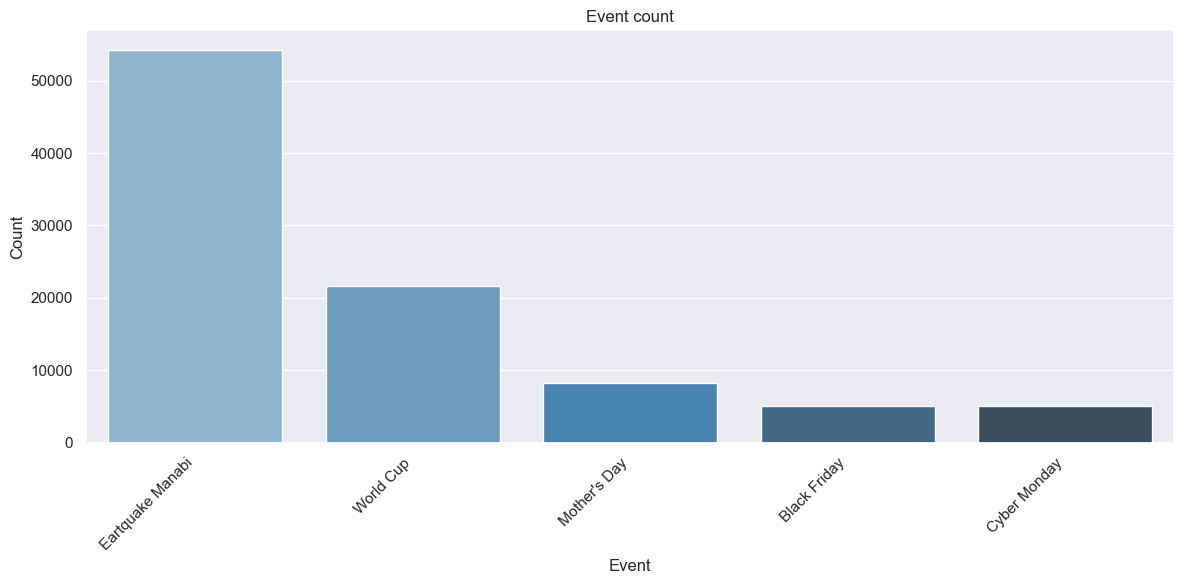

In [310]:
event_df = df_merged[df_merged["event"] == "Event"]
plt.figure(figsize=(12, 6))
sns.countplot(event_df["description"], order=event_df["description"].value_counts(ascending=False).index, palette = "Blues_d")
plt.title('Event count')
plt.xlabel('Event')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [311]:
sales_per_event = event_df.groupby ('description')['sales'].sum().reset_index()

# copy the dataframe
total_sales_of_events = sales_per_event.copy()
sales_per_event['sales'] = pd.to_numeric(sales_per_event['sales'])

# change to readable format
total_sales_of_events['sales'] = total_sales_of_events['sales'].apply(lambda x: '{:,.0f}'.format(x))
total_sales_of_events

,description,sales
0,Black Friday,"1,942,526"
1,Cyber Monday,"2,332,033"
2,Eartquake Manabi,"27,339,491"
3,Mother's Day,"3,105,460"
4,World Cup,"7,757,958"


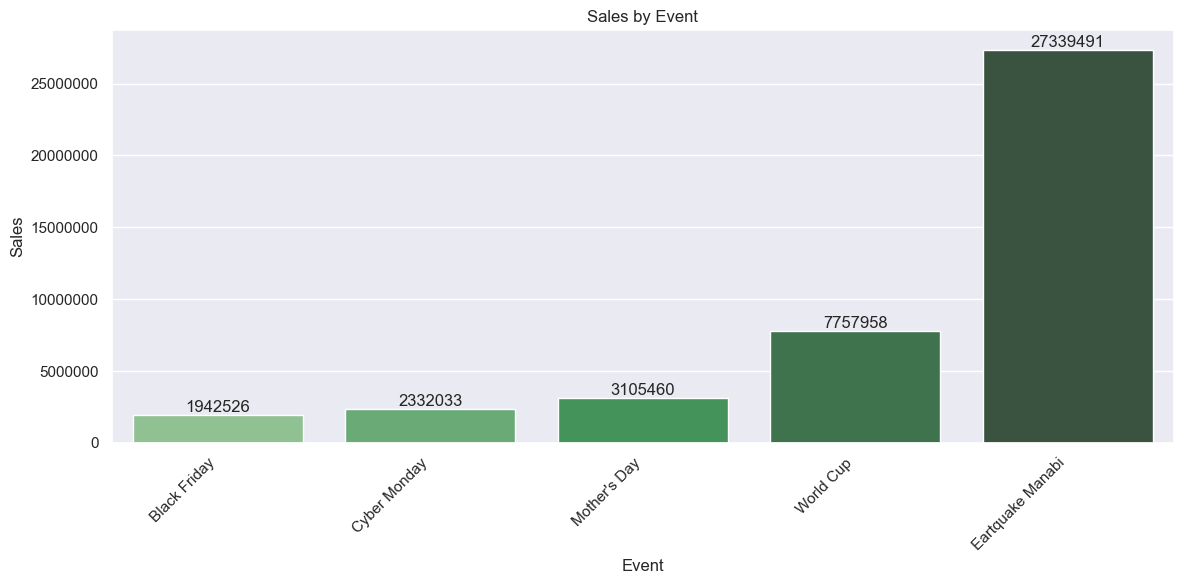

In [312]:
plt.figure(figsize=(12, 6))
ax =  sns.barplot(x='description', y='sales', data=sales_per_event, palette = "Greens_d", order=sales_per_event.sort_values('sales').description)
plt.title('Sales by Event')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Event')
plt.ylabel('Sales')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')
plt.tight_layout()
plt.show()

The observed substantial increase in sales following the Manabi earthquake can be explained by the impact of the natural disaster on consumer behavior. After such an event, there is a heightened focus on emergency preparedness, prompting individuals to make purchases of essential goods for immediate needs. This includes non-perishable food, bottled water, and emergency supplies, resulting in a notable surge in sales, particularly in categories such as 'BEVERAGES,' 'BREAD/BAKERY,' 'GROCERY I,' and 'GROCERY II.'<br>

Furthermore, the earthquake likely prompted a surge in demand for goods associated with home repair and reconstruction efforts. Categories like 'HARDWARE,' 'HOME APPLIANCES,' and 'LAWN AND GARDEN' experienced increased sales as individuals sought materials and tools for rebuilding their homes and communities. This dual effect, driven by both emergency preparedness and reconstruction needs, contributed to the observed higher sales figures post-earthquake, showcasing the dynamic response of consumers to the unique challenges posed by natural disasters.

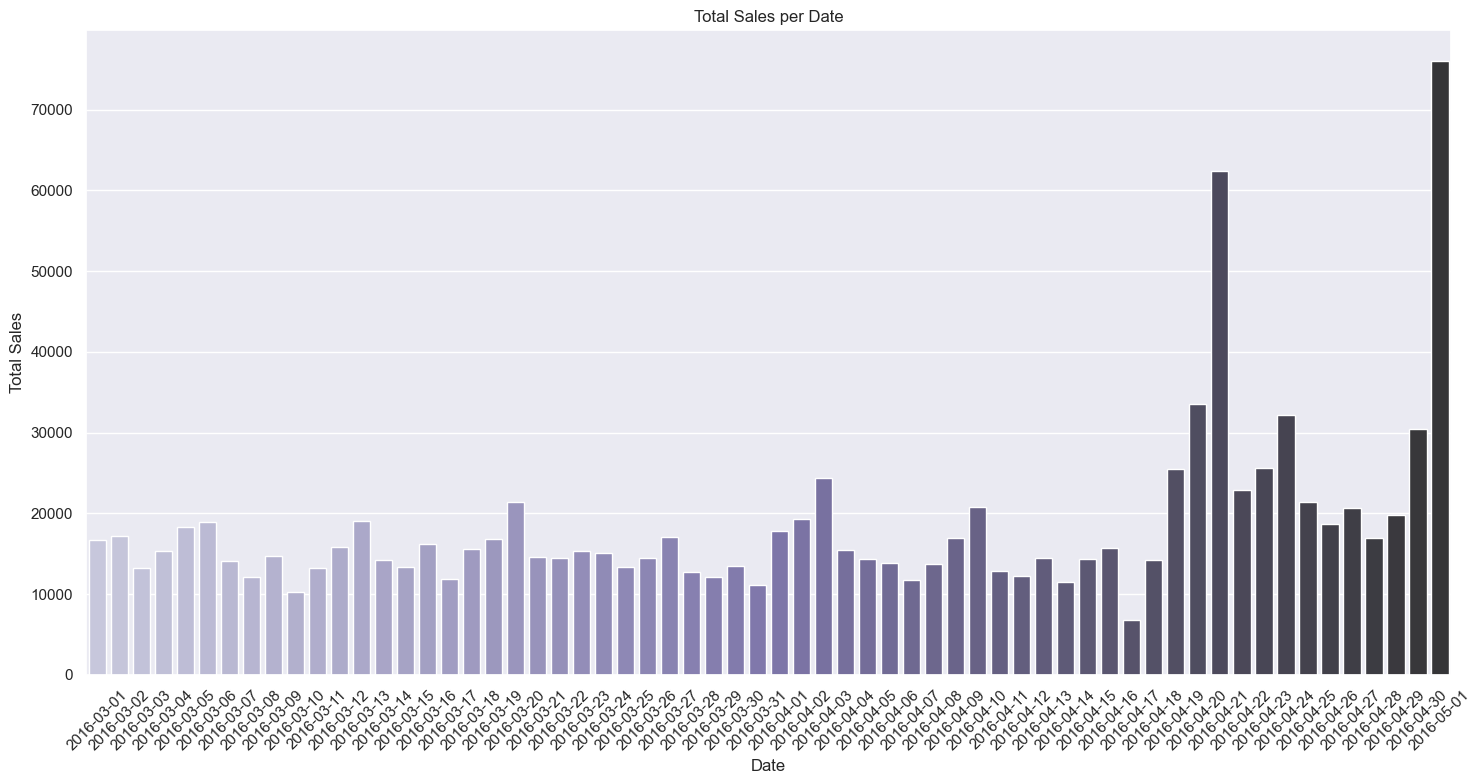

In [313]:
manabi_df = df_merged[df_merged["state"] == "Manabi"][["date","sales","city","state","family"]]
manabi_df_filtered= manabi_df[(manabi_df["date"] >= "2016-03-01") & (manabi_df["date"] <= "2016-05-01")]
grouped_manabi_df = manabi_df_filtered.groupby("date")["sales"].sum().reset_index()
grouped_family_df = manabi_df_filtered.groupby("family")["sales"].sum().reset_index()

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='date', y='sales', data=grouped_manabi_df, palette = "Purples_d")
plt.title('Total Sales per Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # rotation and alignment
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
plt.tight_layout()
plt.show()

The chart above illustrates that sales in the Manabi province typically hover around 20,000. However, in the aftermath of the earthquake, they fluctuate between 30,000 and 60,000 on various days, indicating a noticeable impact of the earthquake. This phenomenon may be attributed to emergency purchases made by individuals following a natural disaster. Such emergency purchases often involve essential items such as food, water, and emergency supplies, resulting in a temporary surge in sales.

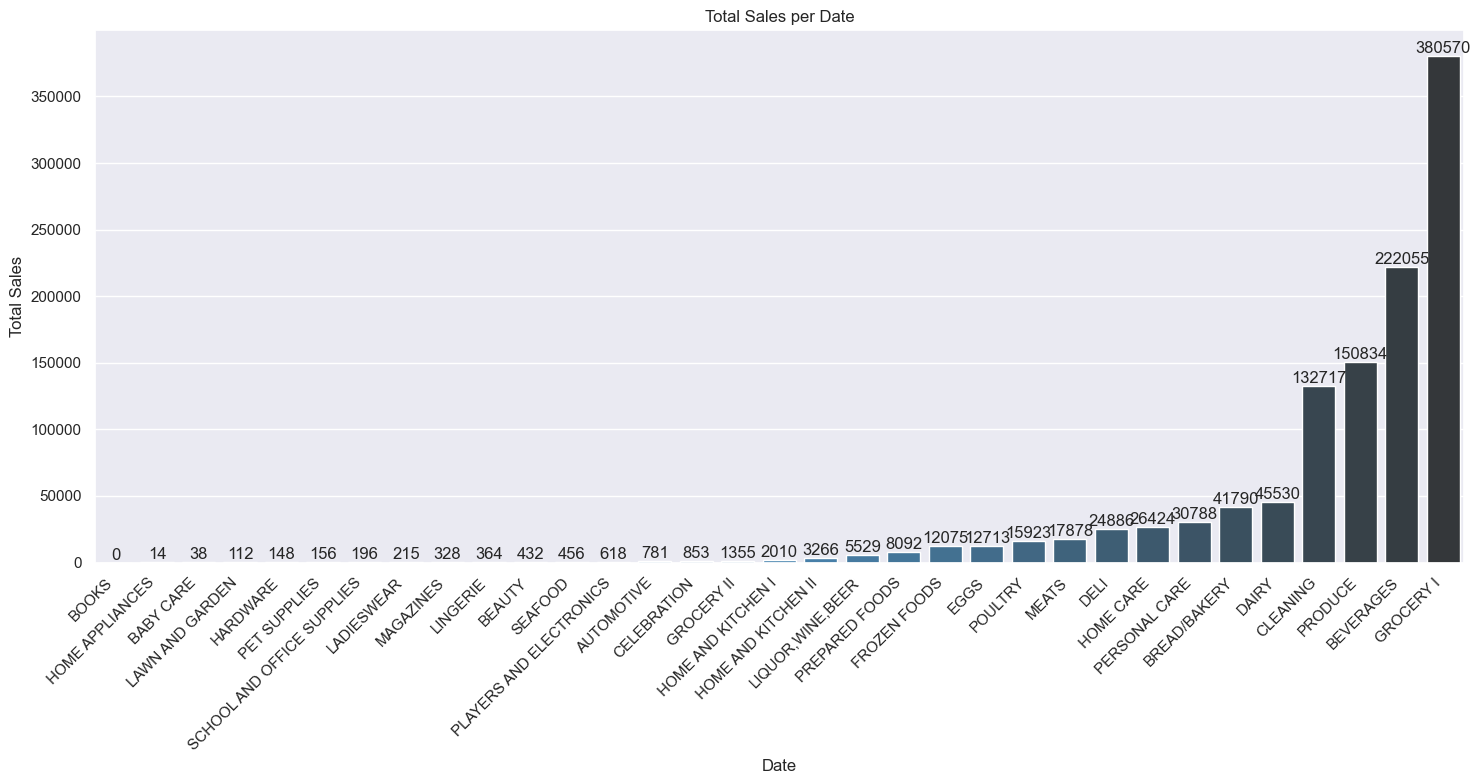

In [314]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='family', y='sales', data=grouped_family_df, palette = "Blues_d", order=grouped_family_df.sort_values('sales').family)
plt.title('Total Sales per Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
# ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')
plt.tight_layout()
plt.show()

In [315]:
df_merged.loc[df_merged["event"].isna(), "event"] = "No Holiday"

In [316]:
df_merged["event"].unique()

array(['Holiday', 'No Holiday', 'Event'], dtype=object)

In [317]:
df_merged.head()

,date,store_nbr,transactions,id,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,event,locale,locale_name,description,transferred
0,2013-01-01,25,770,561,AUTOMOTIVE,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,25,770,562,BABY CARE,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,25,770,563,BEAUTY,2.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,25,770,564,BEVERAGES,810.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,25,770,565,BOOKS,0.0,0,93.14,Salinas,Santa Elena,D,1,Holiday,National,Ecuador,Primer dia del ano,False


In [318]:
df_merged[df_merged["description"].isna()]

,date,store_nbr,transactions,id,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,event,locale,locale_name,description,transferred
33,2013-01-02,1,2111,1782,AUTOMOTIVE,2.000,0,93.14,Quito,Pichincha,D,13,No Holiday,NaN,NaN,NaN,NaN
34,2013-01-02,1,2111,1783,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,No Holiday,NaN,NaN,NaN,NaN
35,2013-01-02,1,2111,1784,BEAUTY,2.000,0,93.14,Quito,Pichincha,D,13,No Holiday,NaN,NaN,NaN,NaN
36,2013-01-02,1,2111,1785,BEVERAGES,1091.000,0,93.14,Quito,Pichincha,D,13,No Holiday,NaN,NaN,NaN,NaN
37,2013-01-02,1,2111,1786,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,No Holiday,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803444,2017-08-14,54,818,2998969,POULTRY,56.155,0,47.59,El Carmen,Manabi,C,3,No Holiday,NaN,NaN,NaN,NaN
2803445,2017-08-14,54,818,2998970,PREPARED FOODS,147.000,0,47.59,El Carmen,Manabi,C,3,No Holiday,NaN,NaN,NaN,NaN
2803446,2017-08-14,54,818,2998971,PRODUCE,585.615,3,47.59,El Carmen,Manabi,C,3,No Holiday,NaN,NaN,NaN,NaN
2803447,2017-08-14,54,818,2998972,SCHOOL AND OFFICE SUPPLIES,0.000,0,47.59,El Carmen,Manabi,C,3,No Holiday,NaN,NaN,NaN,NaN


In [319]:
# locale
df_merged.loc[df_merged["locale"].isna(), "locale"] = 0 # no holiday locale
df_merged.loc[df_merged["locale"]=="National", "locale"] = 1 # national holiday
df_merged.loc[df_merged["locale"]=="Regional", "locale"] = 2 # regional holiday
df_merged.loc[df_merged["locale"]=="Local", "locale"] = 3 # local holiday
df_merged["locale"] = df_merged["locale"].astype("category")

# transferred
df_merged.loc[df_merged["transferred"].isna(), "transferred"] = False # no holiday therefore no transfer
df_merged.loc[df_merged["transferred"]== False, "locale"] = 0 # no holiday transfer
df_merged.loc[df_merged["transferred"]== True, "locale"] = 1 # available holiday transfer
df_merged["transferred"] = df_merged["transferred"].astype("category")

# description

religious_days_to_replace = ["Navidad-4", "Navidad-3", "Navidad-2", "Navidad-1", "Navidad+1", "Viernes Santo", "Carnaval","Dia de Difuntos"]
national_independence_days_to_replace = ["Independencia de Guayaquil", "Independencia de Cuenca", "Provincializacion de Cotopaxi",
                                         "Provincializacion de Santo Domingo", "Fundacion de Guayaquil-1", "Fundacion de Guayaquil", 
                                         "Primer Grito de Independencia", "Batalla de Pichincha", "Independencia de Latacunga", 
                                         "Independencia de Ambato", "Independencia de Guaranda"]
civic_events_to_replace = ["Fundacion de Manta", "Fundacion de Cuenca", "Cantonizacion de Libertad", "Cantonizacion de Guaranda",
                           "Cantonizacion de Riobamba", "Cantonizacion del Puyo", "Fundacion de Santo Domingo",
                           "Cantonizacion de Cayambe", "Fundacion de Riobamba", "Fundacion de Ambato", "Cantonizacion de Latacunga",
                           "Fundacion de Ibarra", "Cantonizacion de Quevedo", "Provincializacion Santa Elena",
                           "Fundacion de Quito-1", "Fundacion de Quito", "Fundacion de Loja", "Cantonizacion de Salinas",
                           "Provincializacion de Imbabura", "Fundacion de Machala"]
shopping_events_to_replace = ["Black Friday", "Cyber Monday"]
disasters_to_replace = ["Eartquake Manabi"]
sports_events_to_replace = ["World Cup"]
bridge_recovery_days_to_replace = ["Recupero Puente Navidad", "Puente Navidad", "Puente Primer dia del ano",
                                   "Recupero Puente Primer dia del ano", "Traslado Independencia de Guayaquil",
                                   "Traslado Batalla de Pichincha", "Traslado Fundacion de Guayaquil",
                                   "Traslado Primer Grito de Independencia", "Puente Dia de Difuntos",
                                   "Recupero Puente Dia de Difuntos", "Traslado Primer dia del ano",
                                   "Recupero puente primer dia del ano", "Recupero puente Navidad",
                                   "Primer dia del ano-1"]
traditional_folk_days_to_replace = ["Dia del Trabajo", "Dia de la Madre-1", "Mother's Day",
                                    "Cantonizacion de El Carmen", "Fundacion de Esmeraldas", "Primer dia del ano"]


df_merged.loc[df_merged["description"].isna(), "description"] = 0 # no holiday description
df_merged.loc[df_merged["description"].isin(religious_days_to_replace), "description"] = 1 
df_merged.loc[df_merged["description"].isin(national_independence_days_to_replace), "description"] = 2
df_merged.loc[df_merged["description"].isin(civic_events_to_replace), "description"] = 3

df_merged.loc[df_merged["description"].isin(shopping_events_to_replace), "description"] = 4
df_merged.loc[df_merged["description"].isin(disasters_to_replace), "description"] = 5
df_merged.loc[df_merged["description"].isin(sports_events_to_replace), "description"] = 6
df_merged.loc[df_merged["description"].isin(bridge_recovery_days_to_replace), "description"] = 7
df_merged.loc[df_merged["description"].isin(traditional_folk_days_to_replace), "description"] = 8
df_merged["description"] = df_merged["description"].astype("category")

df_merged["event"] = df_merged["event"].astype("category")
df_merged = df_merged.drop("locale_name", axis=1)

There are four categories in the `locale` feature: <i>national</i>, <i>regional</i>, <i>local</i>, and <i>no locale</i>. These will be converted to categorical values 0, 1, 2, and 3, respectively.<br>

The `transferred` feature has two categories: True and False. Therefore, NaN values will be replaced with <i>False</i> as they represent <i>no holiday transfer</i>.<br>

The `event` feature comprises 62 different event types. Some of these types describe the same event on different days, and others depict similar events, such as Mother's Day and Father's Day. To streamline these events into distinct categories, they will be clustered as follows:

1. Religious Holidays
2. National Independence Holidays
3. Civic Events
4. Shopping Events
5. Natural Disasters
6. Sports Events
7. Bridge/Recovery Days
8. Traditional Folk Events


In [324]:
df_merged["city"].unique()

array(['Salinas', 'Quito', 'Santo Domingo', 'Cayambe', 'Latacunga',
       'Riobamba', 'Ibarra', 'Guaranda', 'Ambato', 'Guayaquil', 'Daule',
       'Babahoyo', 'Quevedo', 'Playas', 'Cuenca', 'Loja', 'Machala',
       'Esmeraldas', 'El Carmen', 'Libertad', 'Manta', 'Puyo'],
      dtype=object)

# TODO:
- Create a frequency encoding for city, state and family
= `train.groupby('nom_1').size() / len(train)`